In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../../")

%load_ext autoreload
%autoreload 2

from src.Structure import AtomCls

from src.Visual import Grotrian

from src.Util import Class

---

In [3]:
folder = "../../data/atom/Ca_II/"
file_Level     = folder + "Ca_II.Level"
file_Aji = folder + "Einstein_A/Nist.Aji"
file_CEe = folder + "Collisional_Excitation/RH.Electron"
atom = AtomCls.Atom(file_Level, _file_Aji=file_Aji, _file_CEe=file_CEe)

Reading Einstein Aji coefficient from : 
 ../../data/atom/Ca_II/Einstein_A/Nist.Aji
...
Finished.

Reading Electron impact Effective Collisional Strength from : 
 ../../data/atom/Ca_II/Collisional_Excitation/RH.Electron
Finished.



## Attributes

In [4]:
Class.help_attribute(atom)

Attributes
----------------------------------------------------------------------
name                         type               value/len/shape
----------------------------------------------------------------------

filepath_dict                dict               l: 3
Title                        str                v: Ca II H/K ...
Z                            int                v: 20
Element                      str                v: Ca
nLevel                       int                v: 6
Mass                         float              v: 40.08
Abun                         float              v: 2.5118864315095823e-06
Level                        recarray           ---
  |-> erg                    float64 array      s: (6,)
  |-> g                      uint8 array        s: (6,)
  |-> stage                  uint8 array        s: (6,)
  |-> gamma                  float64 array      s: (6,)
  |-> isGround               bool array         s: (6,)
Level_ctj_table              tuple      

the above execution mainly creates 

- `np.recarray` : `atom.Level`, `atom.Line`, `atom.Cont`
- class object : `atom.CE`.

In [12]:
Class.help_recarray(atom.Level)

name                         type               value/len/shape
----------------------------------------------------------------------
                             recarray           ---
  |-> erg                    float64 array      s: (6,)
  |-> g                      uint8 array        s: (6,)
  |-> stage                  uint8 array        s: (6,)
  |-> gamma                  float64 array      s: (6,)
  |-> isGround               bool array         s: (6,)



In [113]:
Class.help_recarray(atom.Line)

name                         type               value/len/shape
----------------------------------------------------------------------
                             recarray           ---
  |-> idxI                   uint16 array       s: (10,)
  |-> idxJ                   uint16 array       s: (10,)
  |-> AJI                    float64 array      s: (10,)
  |-> f0                     float64 array      s: (10,)
  |-> w0                     float64 array      s: (10,)
  |-> w0_AA                  float64 array      s: (10,)
  |-> Gamma                  float64 array      s: (10,)



In [115]:
Class.help_recarray(atom.Cont)

name                         type               value/len/shape
----------------------------------------------------------------------
                             recarray           ---
  |-> idxI                   uint16 array       s: (5,)
  |-> idxJ                   uint16 array       s: (5,)
  |-> f0                     float64 array      s: (5,)
  |-> w0                     float64 array      s: (5,)
  |-> w0_AA                  float64 array      s: (5,)



In [13]:
Class.help_attribute(atom.CE)

Attributes
----------------------------------------------------------------------
name                         type               value/len/shape
----------------------------------------------------------------------

CE_type                      str                v: ECS
Te_table                     array              s: (6,)
Omega_table                  array              s: (10, 6)
Coe                          recarray           ---
  |-> idxI                   uint8 array        s: (10,)
  |-> idxJ                   uint8 array        s: (10,)
  |-> f1                     uint8 array        s: (10,)
  |-> f2                     uint8 array        s: (10,)
  |-> gi                     uint8 array        s: (10,)
  |-> gj                     uint8 array        s: (10,)
  |-> dEij                   float64 array      s: (10,)



---

In [14]:
file_CIe = folder + "Collisional_Ionization/RH.Electron"
atom.read_CI(_path_electron=file_CIe)

Reading Electron impact Collisional Ionization coefficient from : 
 ../../data/atom/Ca_II/Collisional_Ionization/RH.Electron
Finished.



the above execution mainly creates 

- class object : `atom.CI`

In [15]:
Class.help_attribute(atom.CI)

Attributes
----------------------------------------------------------------------
name                         type               value/len/shape
----------------------------------------------------------------------

Te_table                     array              s: (6,)
Omega_table                  array              s: (5, 6)
Coe                          recarray           ---
  |-> idxI                   uint8 array        s: (5,)
  |-> idxJ                   uint8 array        s: (5,)
  |-> f1                     uint8 array        s: (5,)
  |-> f2                     uint8 array        s: (5,)
  |-> gi                     uint8 array        s: (5,)
  |-> gj                     uint8 array        s: (5,)
  |-> dEij                   float64 array      s: (5,)



---

In [16]:
file_PI  = folder + "Photoionization/RH.Alpha"
atom.read_PI(_path_alpha=file_PI)

Reading Photoionization cross section from : 
 ../../data/atom/Ca_II/Photoionization/RH.Alpha
Finished.



the above execution mainly creates 

- class object : `atom.PI`

In [17]:
Class.help_attribute(atom.PI)

Attributes
----------------------------------------------------------------------
name                         type               value/len/shape
----------------------------------------------------------------------

Coe                          recarray           ---
  |-> idxI                   uint8 array        s: (5,)
  |-> idxJ                   uint8 array        s: (5,)
  |-> nLambda                uint16 array       s: (5,)
  |-> alpha0                 float64 array      s: (5,)
  |-> gi                     uint8 array        s: (5,)
  |-> gj                     uint8 array        s: (5,)
  |-> dEij                   float64 array      s: (5,)
alpha_table                  list of array      l: 5



---

In [19]:
file_Rad = folder + "Ca_II.RadiativeLine"
atom.read_RadiativeLine_and_make_Line_Mesh(_path=file_Rad)
atom.make_Cont_Mesh()

Reading Radiative Line information from : 
 ../../data/atom/Ca_II/Ca_II.RadiativeLine
line mesh prepared.
continuum mesh prepared.


the above execution mainly creates 

- class object : `atom.Mesh`

In [11]:
Class.help_attribute(atom.Mesh)

Attributes
----------------------------------------------------------------------
name                         type               value/len/shape
----------------------------------------------------------------------

nRadiativeLine               int                v: 5
Coe                          recarray           ---
  |-> idxI                   uint8 array        s: (5,)
  |-> idxJ                   uint8 array        s: (5,)
  |-> lineIndex              uint16 array       s: (5,)
  |-> ProfileType            uint8 array        s: (5,)
  |-> qcore                  float64 array      s: (5,)
  |-> qwing                  float64 array      s: (5,)
  |-> nLambda                uint16 array       s: (5,)
RadLine_filenames            list of str        l: 5
RadLine                      list of array      l: 5
Cont                         list of array      l: 5



---

In [22]:
atom.read_RadLine_intensity(_folder="../../data/intensity/Ca_II/")

the above execution mainly creates 

- class object : `atom.I_Rad`

In [23]:
Class.help_attribute(atom.I_Rad)

Attributes
----------------------------------------------------------------------
name                         type               value/len/shape
----------------------------------------------------------------------

I_cm                         list of array      l: 5
I_hz                         list of array      l: 5
lineIndex                    array              s: (5,)



## Methods

In [25]:
atom.cont_ctj_to_cont_idx?

In [24]:
Class.help_method(atom)

Methods
----------------------------------------------------------------------

cont_ctj_to_cont_idx

        (ctj_i, ctj_j) --> (idxI, idxJ)

cont_ctj_to_cont_index

        (ctj_i, ctj_j) --> cont index (cont No.)

cont_idx_to_cont_ctj

        (idxI, idxJ) --> (ctj_i, ctj_j)

cont_idx_to_cont_index

        (idxI, idxJ) --> cont index (cont No.)

cont_index_to_cont_ctj

        line index (line No.) --> (ctj_i, ctj_j)

cont_index_to_cont_idx

        cont index (cont No.) --> (idxI, idxJ)

ctj_to_level_idx

        ctj --> idx

get_nTran_nLine_nCont

        based on self.Level,
        compute self.nTran, self.nLine, self.nCont

level_idx_to_ctj

        idx --> ctj

line_ctj_to_line_idx

        (ctj_i, ctj_j) --> (idxI, idxJ)

line_ctj_to_line_index

        (ctj_i, ctj_j) --> line index (line No.)

line_idx_to_line_ctj

        (idxI, idxJ) --> (ctj_i, ctj_j)

line_idx_to_line_index

        (idxI, idxJ) --> line index (line No.)

line_index_to_line_ctj

        line index (line

In [26]:
Class.help(atom)

Attributes
----------------------------------------------------------------------
name                         type               value/len/shape
----------------------------------------------------------------------

filepath_dict                dict               l: 6
Title                        str                v: Ca II H/K ...
Z                            int                v: 20
Element                      str                v: Ca
nLevel                       int                v: 6
Mass                         float              v: 40.08
Abun                         float              v: 2.5118864315095823e-06
Level                        recarray           ---
  |-> erg                    float64 array      s: (6,)
  |-> g                      uint8 array        s: (6,)
  |-> stage                  uint8 array        s: (6,)
  |-> gamma                  float64 array      s: (6,)
  |-> isGround               bool array         s: (6,)
Level_ctj_table              tuple      

![img](./figs/Atom.png)

## Grotrian

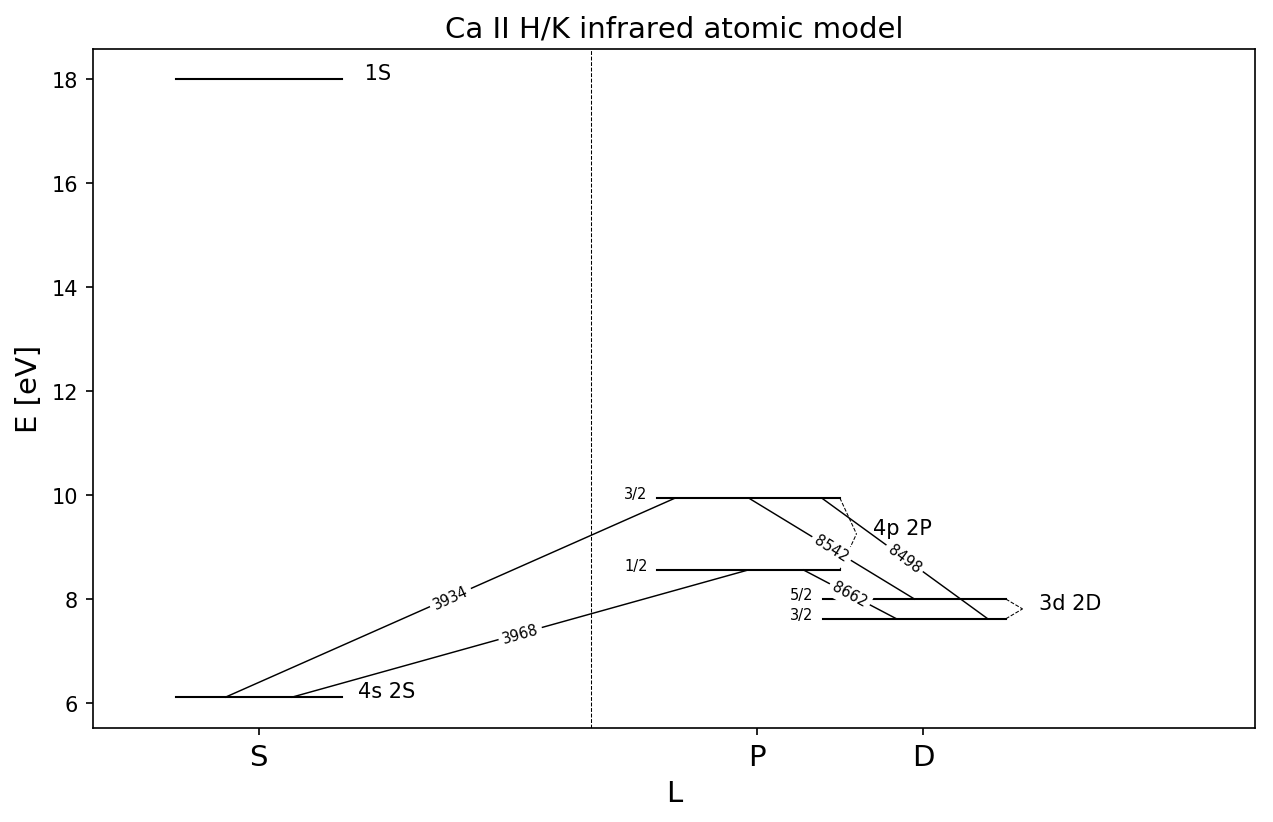

In [10]:
gro = Grotrian.Grotrian(_atom=atom, _conf_prefix="1s2.2s2.2p6.3s2.3p6.")
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50)

line_plot = (
        (0, 3, "3968", 0.7, 0.5),
        (0, 4, "3934", 0.3, 0.1),
        (1, 3, "8662", 0.4, 0.8),
        (1, 4, "8498", 0.9, 0.9),
        (2, 4, "8542", 0.5, 0.5),
    )
for i, j, wl, _r1, _r2 in line_plot:
    _ctj1 = atom.Level_ctj_table[i]
    _ctj2 = atom.Level_ctj_table[j]
    gro.connect_line(_cfj1=_ctj1, _cfj2=_ctj2, _r1=_r1, _r2=_r2, _c="black", _text=wl, _tsize=7, _r=0.4)
gro.show_fig()